# With statement in Python

In [3]:
# 'With' is good for (i) error/exception handling, (ii) memory usage (open/close files), (iii) readability!
with open('./Week_2/example.txt', 'r') as f:
    for a_line in f:
        pass # do something

# Another way:
f = open('./Week_2/example.txt', 'r')
for a_line in f:
    pass # do something
f.close()

# This might be not bad because Python automatically closes and empties memory after running the for loop,
# But the 'with' statement is a legitimate way
for a_line in open('./Week_2/example.txt', 'r'):
    pass # do something

FileNotFoundError: [Errno 2] No such file or directory: './Week_2/example.txt'

# AddHs

In [4]:
from rdkit import Chem
mol = Chem.MolFromSmiles('CCO')
print([atom.GetSymbol() for atom in mol.GetAtoms()]  )
mol = Chem.AddHs(mol)
print([atom.GetSymbol() for atom in mol.GetAtoms()]  )

['C', 'C', 'O']
['C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H']


# List vs. Tuple

In [5]:
a = [1,2,3]
a[1] = 4
print(a)

b = (1,2,3)
b[1] = 4
# 'tuple' object does not support item assignment

[1, 4, 3]


TypeError: 'tuple' object does not support item assignment

In [6]:
#List of tuples

list_of_tuples= []
for i in range(4):
    for j in range(i+1, 4):
        list_of_tuples.append((i,j))
print(list_of_tuples)

list_of_lists = []
for i in range(4):
    for j in range(i+1, 4):
        list_of_lists.append([i,j])
print(list_of_lists)

# Tuple is good for (i) managing an array of 'constants', \
#(ii) memory usage (generally less memory consumption than list), (iii) readability!

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]


# GetBonds

In [7]:
#The atom indices of each bond do not change, so here I use tuple for saving atom indices
mol = Chem.MolFromSmiles('CCO')
mol = Chem.AddHs(mol)

bonds = []
for bond in mol.GetBonds():
    a1_idx = bond.GetBeginAtom().GetIdx()
    a2_idx = bond.GetEndAtom().GetIdx()
    
    bonds.append((a1_idx, a2_idx))
    
    atom1, atom2 = mol.GetAtomWithIdx(a1_idx), mol.GetAtomWithIdx(a2_idx)
    
    print(atom1.GetSymbol(), atom2.GetSymbol())
    
print(bonds)

C C
C O
C H
C H
C H
C H
C H
O H
[(0, 1), (1, 2), (0, 3), (0, 4), (0, 5), (1, 6), (1, 7), (2, 8)]


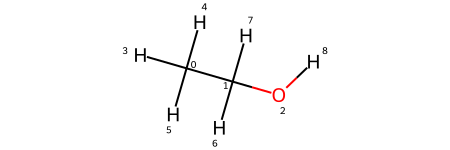

In [8]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
mol

# Dictionary

In [9]:
# Example 1
from rdkit.Chem.Descriptors import MolWt, NumRadicalElectrons
from rdkit.Chem.rdmolops import GetFormalCharge
# integer, float, string can be dictionary 'keys' which are used for indexing
mol_properties = {}
mol_properties['MolWt'] = MolWt(mol)
mol_properties['GetFormalCharge'] = GetFormalCharge(mol)
mol_properties['AtomSymbols'] = [atom.GetSymbol() for atom in mol.GetAtoms()]

print(mol_properties)
print(mol_properties['MolWt'])

{'MolWt': 46.06900000000002, 'GetFormalCharge': 0, 'AtomSymbols': ['C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H']}
46.06900000000002


In [10]:
#dictionary keys
for key in mol_properties.keys():
    print(key, mol_properties[key])

MolWt 46.06900000000002
GetFormalCharge 0
AtomSymbols ['C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H']


In [11]:
#Example 2
atom_dict = {}

atom_dict['C'] = []
atom_dict['H'] = []
atom_dict['O'] = []
for i, atom in enumerate(mol.GetAtoms()):
    print(i, atom.GetSymbol())
    atom_dict[atom.GetSymbol()].append(i)
    
print(atom_dict)
    
## --- OR ---
atom_dict2 = {}
mol_all_elements = list(set(atom.GetSymbol() for atom in mol.GetAtoms()))

for element in mol_all_elements:
    atom_dict2[element] = [i for i, atom in enumerate(mol.GetAtoms()) \
                          if atom.GetSymbol() == element]
print(atom_dict2)

## --- OR ---
atom_dict3 = {}
for i, atom in enumerate(mol.GetAtoms()):
    #atom_dict3[atom.GetSymbol()].append(i)
    try:
        atom_dict3[atom.GetSymbol()].append(i)
    except KeyError:
        atom_dict3[atom.GetSymbol()] = [i]
    

print(atom_dict3)

# Please let me know after the meeting if you know any better ways to do this

0 C
1 C
2 O
3 H
4 H
5 H
6 H
7 H
8 H
{'C': [0, 1], 'H': [3, 4, 5, 6, 7, 8], 'O': [2]}
{'O': [2], 'H': [3, 4, 5, 6, 7, 8], 'C': [0, 1]}
{'C': [0, 1], 'O': [2], 'H': [3, 4, 5, 6, 7, 8]}


# Exercise 1

Make a dictionary of the bonds of the molecule 'CCO'

Keys: bond types (C-C, C-H, etc.), each key has a list of tuples of atom indices.

Bond types should be in an alphabetical order (e.g. H-C --> C-H)

In [12]:
mol = Chem.MolFromSmiles('CCO')
mol = Chem.AddHs(mol)

bonds = []
bond_types = []

for bond in mol.GetBonds():
    a1_indx = bond.GetBeginAtom().GetIdx()
    a2_indx = bond.GetEndAtom().GetIdx()
    a1, a2 = mol.GetAtomWithIdx(a1_indx).GetSymbol(), mol.GetAtomWithIdx(a2_indx).GetSymbol()

    bond_type = "-".join(sorted([a1, a2]))
                         
    bonds.append([a1_indx, a2_indx])
    bond_types.append(bond_type)
    
print(bond_types)
    


['C-C', 'C-O', 'C-H', 'C-H', 'C-H', 'C-H', 'C-H', 'H-O']


# PubChemPy

In the data experimentalists give us or in experimental databases, molecules are usually described as IUPAC name or CAS number rather than SMILES. So, I wanted to cover PubChemPy which is one of the ways to convert IUPAC name or CAS number into SMILES. Also, molecular properties can be obtained in dictionary format.

In [13]:
import pubchempy as pcp

# Since pcp.get_compounds returns a list of compounds (usually one compound, but sometimes >1), so index 0 is called
glucose = pcp.get_compounds('glucose','name')[0]
caffeine = pcp.get_compounds('58-08-2','name')[0]

caffeine_dict = caffeine.to_dict()
print(caffeine_dict.keys())
print('-------------------')
print(caffeine_dict['canonical_smiles'])
print(caffeine.canonical_smiles)
print('-------------------')

print(caffeine.to_dict(properties = ['canonical_smiles', 'tpsa','atoms', 'bonds']))

dict_keys(['atom_stereo_count', 'atoms', 'bond_stereo_count', 'bonds', 'cactvs_fingerprint', 'canonical_smiles', 'charge', 'cid', 'complexity', 'conformer_id_3d', 'conformer_rmsd_3d', 'coordinate_type', 'covalent_unit_count', 'defined_atom_stereo_count', 'defined_bond_stereo_count', 'effective_rotor_count_3d', 'elements', 'exact_mass', 'feature_selfoverlap_3d', 'fingerprint', 'h_bond_acceptor_count', 'h_bond_donor_count', 'heavy_atom_count', 'inchi', 'inchikey', 'isomeric_smiles', 'isotope_atom_count', 'iupac_name', 'mmff94_energy_3d', 'mmff94_partial_charges_3d', 'molecular_formula', 'molecular_weight', 'monoisotopic_mass', 'multipoles_3d', 'pharmacophore_features_3d', 'record', 'rotatable_bond_count', 'shape_fingerprint_3d', 'shape_selfoverlap_3d', 'tpsa', 'undefined_atom_stereo_count', 'undefined_bond_stereo_count', 'volume_3d', 'xlogp'])
-------------------
CN1C=NC2=C1C(=O)N(C(=O)N2C)C
CN1C=NC2=C1C(=O)N(C(=O)N2C)C
-------------------
{'canonical_smiles': 'CN1C=NC2=C1C(=O)N(C(=O)N2C

# Read and write json file

In [14]:
import json
#write json
with open('./Week_3/caffeine.json', 'w') as f:
    json.dump(caffeine_dict, f, indent = 4)

#read json
with open('./Week_3/caffeine.json','r') as f:
    data = json.load(f)
    for key in data.keys():
        print(key, data[key])

atom_stereo_count 0
atoms [{'aid': 1, 'number': 8, 'element': 'O', 'x': 3.732, 'y': 2}, {'aid': 2, 'number': 8, 'element': 'O', 'x': 2, 'y': -1}, {'aid': 3, 'number': 7, 'element': 'N', 'x': 3.732, 'y': -1}, {'aid': 4, 'number': 7, 'element': 'N', 'x': 5.5443, 'y': 0.8047}, {'aid': 5, 'number': 7, 'element': 'N', 'x': 2.866, 'y': 0.5}, {'aid': 6, 'number': 7, 'element': 'N', 'x': 5.5443, 'y': -0.8047}, {'aid': 7, 'number': 6, 'element': 'C', 'x': 4.5981, 'y': 0.5}, {'aid': 8, 'number': 6, 'element': 'C', 'x': 4.5981, 'y': -0.5}, {'aid': 9, 'number': 6, 'element': 'C', 'x': 3.732, 'y': 1}, {'aid': 10, 'number': 6, 'element': 'C', 'x': 2.866, 'y': -0.5}, {'aid': 11, 'number': 6, 'element': 'C', 'x': 6.1279, 'y': 0}, {'aid': 12, 'number': 6, 'element': 'C', 'x': 3.732, 'y': -2}, {'aid': 13, 'number': 6, 'element': 'C', 'x': 5.855, 'y': 1.7552}, {'aid': 14, 'number': 6, 'element': 'C', 'x': 2, 'y': 1}, {'aid': 15, 'number': 1, 'element': 'H', 'x': 6.7479, 'y': 0}, {'aid': 16, 'number': 1, 

# Exercise 2

(1) open ./Week_3/smi_list_from_Week_2, parse a list of smiles 

(2) make dictionary, classify them in terms of the total number of atoms

The dictionary should look like:

{ 5: ['O=CO', 'C'], 10: ['CCO[C-]=O', 'C=C=CC', 'C=COC', 'CCOO', 'COOC', 'C1COC1', 'CC1CO1', 'CC#CC', 'O=C1C=CCO1', 'CC1=CC1', 'c1ccccc#1', 'O=C1OCCO1', 'C=C1CC1', 'C#CC(=O)OC', 'C#CC#CC#CC#C', 'CC(C)=O', 'C#CCC', 'OCCO', 'CCC=O', 'O=C1CC(=O)C1'], ... }

(3) Write ./Week_3/exercise_2.json .

In [15]:

mols = []
tot_atoms = []
smiles_by_tot_atoms = {}

with open('./Week_3/smi_list_from_Week_2', 'r') as f:
    for line in f:
        smiles = line[:-1]
        mol = Chem.MolFromSmiles(smiles)
        mol = Chem.AddHs(mol)
        mols.append(mol)
        tot_atoms.append(len(mol.GetAtoms()))
        
tot_atoms = list(set(tot_atoms))
for mol in mols:
    if len(mol.GetAtoms()) in smiles_by_tot_atoms:
        smiles_by_tot_atoms[len(mol.GetAtoms())].add(Chem.MolToSmiles(mol))
    else:
        smiles_by_tot_atoms[len(mol.GetAtoms())] = {Chem.MolToSmiles(mol)}
        
def set_default(obj):
    if isinstance(obj, set):
        return list(obj)
    raise TypeError
    
with open('./Week_3/exercise_2.json', 'w') as f:
    json.dump(smiles_by_tot_atoms, f, sort_keys = True, indent = 4, default = set_default)
    

RDKit WARNING: [05:21:59] WARNING: not removing hydrogen atom without neighbors


# Assignment - Week 3

(1) open ./Week_3/smi_list_from_Week_2, parse a list of smiles 


(2) open ./Week_3/Week_3_iupac_name_cas_no, convert iupac or cas number to a smiles string

If pubchempy returns multiple compounds, please use the 0th one. 

If pubchempy returns no compounds, please just skip it.


(3) Merge (1) and (2), remove duplicates

Please note that the canonical smiles from PubChem needs to be 're-canonicalized' in RDKit to remove duplicates


(4) Collect the molecules that consist of C or H or O or N (and no other elements) and not more than 20 nonhydrogen atoms (mol.GetNumHeavyAtoms()), classify them in terms of stoichiometry

The dictionary should look like:

{'C11H22O2': ['CCCCCCC(=O)OC(C)CC', 'CCCCCCC1COC(C)(C)O1', 'CCCCC(CCCC)C(=O)OC', 'CCCCC(CC)COC(=O)CC', 'CCCCCCCCCOC(C)=O', 'CCCCCCOC(=O)CCCC', 'CCCCCOC(=O)CCCCC', 'CCCCCCCOC(=O)CCC', 'CCCCC(=O)OC(C)CCCC', 'CCCCCCCC(=O)OCCC', 'CCCCCCC(C)(C)CC(=O)O', 'CCCCCCC(=O)OCCCC', 'CCCCCCC1(C)OCCCO1', 'CCCCCCCC(=O)OC(C)C', 'CC(C)CCCC(C)CCC(=O)O', 'CCCCCCC(=O)OC(C)(C)C', 'CCCCCCCCOC(=O)CC', 'CCCCCC(C)OC(=O)CCC', 'CCCCCCCCCCC(=O)O', 'CCCCCCCCC(C)C(=O)O', 'CCCCCCCCCCOC=O', 'CCCCCCCCC(=O)OCC', 'CCOC(=O)CCCCCC(C)C', 'CCOC(=O)CCCCC(C)CC', 'CCCCCCCCCC(=O)OC', 'CCCCCCCOC(=O)C(C)C'], 'H2O': ['O'], ... }

Avoid writing '1's. e.g.) H2O1 --> H2O

Follow alphabetical orders. e.g.) 'C8H10N4O2'

(5) Write ./Week_3/Assignment.json .


In [16]:
week2_smiles = []
iupacs = []
smiles_from_iupac = []

with open('./Week_3/smi_list_from_Week_2', 'r') as f:
    for line in f:
        smiles = line[:-1]
        molecule = Chem.MolFromSmiles(smiles)
        smiles = Chem.MolToSmiles(molecule)
        week2_smiles.append(smiles)

with open('./Week_3/Week_3_iupac_name_cas_no', 'r') as f:
    for line in f:
        molec = line[:-1]
        iupacs.append(molec)

for name in iupacs:
    try:
        molec = pcp.get_compounds(name, 'name')[0].canonical_smiles
        smiles_from_iupac.append(molec)        
    except:
        print("No PubChem info found for {} !".format(name))
        
print(smiles_from_iupac)

RDKit WARNING: [05:22:06] WARNING: not removing hydrogen atom without neighbors


No PubChem info found for 3-iodo-6-methylhexadecane !
No PubChem info found for 2-iodo-2-pentadecene !
No PubChem info found for 1,13-dichloroeicosane !
No PubChem info found for 1,13-dichlorohexadecane !
No PubChem info found for 8-methyldecanol !
No PubChem info found for 10-methyl-3-dodecyne !
No PubChem info found for 1-methyl-6-undecen-1-ol !
No PubChem info found for 7-methyl-2-octyne !
No PubChem info found for 2,6-dimethyl-7-heptenal !
No PubChem info found for 6-methyl-2-undecenal !
No PubChem info found for 5-ethyl-2-pentadecynoic acid !
No PubChem info found for 7-methyl-9-undecyn-1-ol !
No PubChem info found for 3-bromo-2-ethyl-1-propene !
No PubChem info found for 2,4-dimethyl-trans-3-hexene !
No PubChem info found for 1,14-nonadecanedithiol !
No PubChem info found for 10-methyl-5-tridecenal !
No PubChem info found for 6-ethyl-1-heptene !
No PubChem info found for 14-methyl-2-nonadecenoic acid !
No PubChem info found for 2-methyl-4-undecenoic acid !
No PubChem info found f

In [25]:
#THIS IS A TOTAL MESS


cannonical_iupac = []
for smiles in smiles_from_iupac:
    molec = Chem.MolFromSmiles(smiles)
    smile = Chem.MolToSmiles(molec)
    cannonical_iupac.append(smile)

all_smiles = list(set(week2_smiles + cannonical_iupac))

organic_molecs = []
organic_atoms = ['C', 'H', 'O', 'N']

for molec in all_smiles:
    mol = Chem.MolFromSmiles(molec)
    atom_symb = []
    for atom in mol.GetAtoms():
        atom_symb.append(atom.GetSymbol())
    if (all((x in organic_atoms) for x in atom_symb) and mol.GetNumHeavyAtoms() <= 20):
        organic_molecs.append(molec)

organic_with_H = []

for molec in organic_molecs:
    mol = Chem.MolFromSmiles(molec)
    mol = Chem.AddHs(mol)
    organic_with_H.append(Chem.MolToSmiles(mol))
    
from collections import Counter 

keys = []

for molec in organic_with_H:
    count = Counter(molec.upper())
    stoich = [count[organic_atoms[0]], count[organic_atoms[1]], count[organic_atoms[2]], count[organic_atoms[3]]]
    key = ''
    for index, val in enumerate(stoich):
        if val != 0:
            if val == 1:
                key += organic_atoms[index]
            else:
                key += (organic_atoms[index] + str(val))
    keys.append(key)

keys = list(set(keys))
stoich_dict = dict.fromkeys(keys)

for molec in organic_with_H:
    count = Counter(molec.upper())
    stoich = [count[organic_atoms[0]], count[organic_atoms[1]], count[organic_atoms[2]], count[organic_atoms[3]]]
    match_key = ''
    for index, val in enumerate(stoich):
        if val != 0:
            if val == 1:
                match_key += organic_atoms[index]
            else:
                match_key += (organic_atoms[index] + str(val))
    for key in stoich_dict.keys():
        if match_key == key:
            if stoich_dict[key]:
                stoich_dict[key] += molec
            else:
                stoich_dict[key] = molec
                
print(stoich_dict)

with open('./Week_3/stoich_dict.json', 'w') as f:
    json.dump(stoich_dict, f, indent = 4)

RDKit WARNING: [05:43:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [05:43:15] WARNING: not removing hydrogen atom without neighbors


{'C16H26O3': '[H]OC(c1c([H])c([H])c(C(OOC(C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])c([H])c1[H])(C([H])([H])[H])C([H])([H])[H]', 'C11H16O': '[H]OC(C([H])([H])[H])(C([H])([H])c1c([H])c([H])c([H])c([H])c1[H])C([H])([H])C([H])([H])[H][H]Oc1c([H])c([H])c(C([H])([H])[H])c([H])c1C([H])(C([H])([H])[H])C([H])([H])C([H])([H])[H][H]Oc1c([H])c([H])c([H])c(C([H])(C([H])([H])C([H])([H])[H])C([H])([H])C([H])([H])[H])c1[H][H]Oc1c([H])c([H])c(C([H])(C([H])([H])[H])C([H])([H])C([H])([H])[H])c([H])c1C([H])([H])[H][H]c1c([H])c([H])c(C([H])([H])OC(C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])c([H])c1[H][H]Oc1c([H])c([H])c([H])c([H])c1C([H])(C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])[H][H]Oc1c([H])c(C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])c([H])c([H])c1C([H])([H])[H][H]Oc1c([H])c([H])c(C(C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])c([H])c1C([H])([H])[H][H]Oc1c([H])c([H])c(C([H])(C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])[H])c([H])c1[H][H]OC(c1c([H])

In [ ]:
# If pubchempy returns no compounds, please just skip it. Perhaps try-except can be used?
# Maybe many molecules are skipped. I brought the molecules quite randomly including very tricky ones, 
# and PubChemPy is not always perfect.
a = []
print(a[0]) #IndexError

'''
try:
   # do something
except IndexError:
    continue # skip this cycle and proceed to the next cycle
'''